# 保存训练过程的metrics数据
保存每个epoch得到的"train_loss/accuracy"和"validation_loss/accuracy"，并实时绘制图形，方便我们根据图形来判断训练的状态，做出及时的调整 譬如发生overfitting(可能由于learning rate太大，网络太冗余导致)，判断何时停止training。

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imgpreprocess.imgtoarray import ImgToArray
from imgpreprocess.imgresize import ImgResize
from imgdatasets.imgload import ImgLoad
from nn.conv.shallownet import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

from callbacks.trainingmonitor import TrainingMonitor 

In [2]:
'''
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
               help="path to input dataset")
ap.add_argument("-m", "--model", required=True,
               help="path to output model")
args = vars(ap.parse_args())
'''

'\nap = argparse.ArgumentParser()\nap.add_argument("-d", "--dataset", required=True,\n               help="path to input dataset")\nap.add_argument("-m", "--model", required=True,\n               help="path to output model")\nargs = vars(ap.parse_args())\n'

In [3]:
print("[INFO] loading images...")
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images("../imgdatasets/animals3"))
print("[INFO] load images dnoe...")

[INFO] loading images...
[INFO] load images dnoe...


In [4]:
print("[INFO] images preprocessing...")
resize = ImgResize(32, 32)
imgtoarray = ImgToArray()

imgload = ImgLoad(preprocessors=[resize, imgtoarray])
(data, labels) = imgload.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0
print("[INFO] images preprocess done")

[INFO] images preprocessing...
[INFO] images preprocess done


In [5]:
print("[INFO] train test dataset split")
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.25, random_state=42, stratify=labels)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

[INFO] train test dataset split


In [6]:
print("[INFO] compiling model...")
opt = SGD(lr=0.001, momentum=0.9, nesterov=True)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [7]:
print("[INFO] trainning network...")
#figPath = os.path.sep.join([args["output"], "{}.png"].format(os.getpid()))
#jsonPath = os.path.sep.join([args["output"], "{}.json"].format(os.getpid()))
figPath = os.path.sep.join(["./results", "{}.png".format(os.getpid())])
jsonPath = os.path.sep.join(["./results", "{}.json".format(os.getpid())])
callbacks = [TrainingMonitor(figPath, jsonPath=jsonPath)]

H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=32, epochs=100, callbacks=callbacks, verbose=1)

[INFO] trainning network...
Epoch 1/100
210/210 [==============================] - 12s 59ms/step - loss: 0.9071 - accuracy: 0.5949 - val_loss: 0.8751 - val_accuracy: 0.6364
Epoch 2/100
210/210 [==============================] - 13s 60ms/step - loss: 0.8425 - accuracy: 0.6355 - val_loss: 0.8487 - val_accuracy: 0.6346
Epoch 3/100
210/210 [==============================] - 13s 60ms/step - loss: 0.8121 - accuracy: 0.6556 - val_loss: 0.8267 - val_accuracy: 0.6431
Epoch 4/100
210/210 [==============================] - 13s 61ms/step - loss: 0.7869 - accuracy: 0.6644 - val_loss: 0.8069 - val_accuracy: 0.6570
Epoch 5/100
210/210 [==============================] - 14s 65ms/step - loss: 0.7686 - accuracy: 0.6741 - val_loss: 0.7879 - val_accuracy: 0.6735
Epoch 6/100
210/210 [==============================] - 15s 72ms/step - loss: 0.7472 - accuracy: 0.6843 - val_loss: 0.7752 - val_accuracy: 0.6758
Epoch 7/100
210/210 [==============================] - 12s 55ms/step - loss: 0.7272 - accuracy: 0.6935

Epoch 57/100
210/210 [==============================] - 11s 54ms/step - loss: 0.3108 - accuracy: 0.8904 - val_loss: 0.7337 - val_accuracy: 0.7120
Epoch 58/100
210/210 [==============================] - 11s 52ms/step - loss: 0.3077 - accuracy: 0.8927 - val_loss: 0.7349 - val_accuracy: 0.7125
Epoch 59/100
210/210 [==============================] - 11s 54ms/step - loss: 0.3069 - accuracy: 0.8945 - val_loss: 0.7339 - val_accuracy: 0.7282
Epoch 60/100
210/210 [==============================] - 11s 53ms/step - loss: 0.2979 - accuracy: 0.8980 - val_loss: 0.7389 - val_accuracy: 0.7179
Epoch 61/100
210/210 [==============================] - 12s 59ms/step - loss: 0.2945 - accuracy: 0.9019 - val_loss: 0.7489 - val_accuracy: 0.7331
Epoch 62/100
210/210 [==============================] - 13s 62ms/step - loss: 0.2891 - accuracy: 0.9046 - val_loss: 0.7448 - val_accuracy: 0.7264
Epoch 63/100
210/210 [==============================] - 13s 61ms/step - loss: 0.2847 - accuracy: 0.9061 - val_loss: 0.7604 -

In [8]:
print("[INFO] serializing network...")
#model.save(args["model"])
model.save("shallownet_animal3_weights.hdf5")

[INFO] serializing network...


In [9]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

        cane       0.76      0.85      0.80      1216
     cavallo       0.70      0.63      0.67       656
    elefante       0.63      0.49      0.55       361

    accuracy                           0.73      2233
   macro avg       0.70      0.66      0.67      2233
weighted avg       0.72      0.73      0.72      2233



ValueError: x and y must have same first dimension, but have shapes (50,) and (100,)

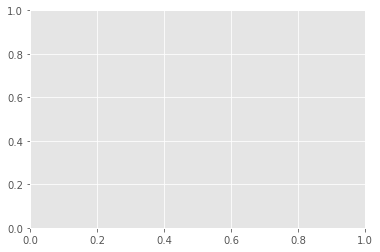

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
plt.title("Trainning Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./results/shallownet_animals3_trainning_result_lr_decay")